# What paths slide the most? Which ones hit the rail and/or highway?

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

avyobs= pd.read_pickle('/Users/ashleyshell/Documents/GitHub.nosync/avalanche-alley/data-prep/pkl/avy_obs.pkl')

In [12]:
pd.set_option('display.max_columns', None)
avyobs

,avrid,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
0,1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
1,2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
2,3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
3,4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
4,5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
487,505,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,NU,R1,D1.5,O,T,U,0,1830,SW,1460,370,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
488,506,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,N,R2,D2,O,T,C,40,2075,SE,1646,429,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
489,507,MCAMSER,2022-03-23,18:00:00,clark_01,HS,5.0,NC,R3,D3,O,T,C,40,2195,SE,1790,405,245,150,40,95,MR,-,U,U,False,0.0,0.0,False,0.0,0.0,Obs on Mar. 24th from Hwy. Could not see runou...,Adam,2022-03-28 16:34:43,10.30.72.4,NaN,0000-00-00 00:00:00,NaN


In [35]:
paths = avyobs.avpathid
paths.value_count()

AttributeError: 'Series' object has no attribute 'value_count'

In [28]:
highway = avyobs.loc[avyobs.deb_hwy == True]
highway

,avrid,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
229,232,IBEAM,2014-03-06,05:30:00,stein_01,SS,5.0,NU,R2,D3,O,T,R,40,2242,N,1230,1012,160,150,100,125,TK,-,U,W,False,0.0,0.0,True,20.0,20.0,SS-N-R2-D3-O.\nDebris terminated at Highway el...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 12:25:56,64.91.61.64
231,234,GOATLICK,2014-03-06,07:00:00,stein_01,SS,5.0,N,R3,D4,O,T,C,35,2212,N,1152,1060,800,120,120,120,BR,-,U,W,False,0.0,0.0,True,30.0,20.0,SS-N-R3-D4-O. Aspect= 240.\nRan full path pass...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 11:52:37,64.91.61.64
257,260,PATH1163,2017-02-09,08:30:00,stein_01,SS,5.0,N,R3,D3,I,M,L,40,2028,SE,1236,792,45,120,90,105,BR,-,U,D,True,100.0,1.5,True,20.0,0.1,Natural SS avalanche in Path 1163 triggered na...,Ted,2017-02-27 15:25:55,139.51.15.20,Ted,2020-06-29 13:13:18,64.91.61.64
260,263,NOSHED,2017-02-07,12:30:00,stein_01,SS,1.0,AX,R4,D2,G,T,C,38,1353,N,1235,118,30,90,60,75,U,BP,3F,D,True,30.0,1.0,True,10.0,0.2,Triggered with Daisy Bell. Avalanche terminate...,Ted,2017-02-27 15:54:02,139.51.15.22,Ted,2020-06-29 09:58:06,64.91.61.64
284,291,AP1183,2017-02-07,03:30:00,stein_01,SS,5.0,N,R3,D3,O,T,C,39,1697,N,1030,667,364,120,300,210,BR,-,-,D,True,120.0,2.0,True,30.0,0.1,1183 avalanche ran at approximately 2230 on 2/...,Ted,2017-12-28 13:19:38,139.51.15.19,Ted,2020-06-29 10:33:44,64.91.61.64


In [29]:
name = highway.avpathid.to_frame()
name

,avpathid
229,IBEAM
231,GOATLICK
257,PATH1163
260,NOSHED
284,AP1183


<AxesSubplot:xlabel='avpathid', ylabel='deb_hwy'>

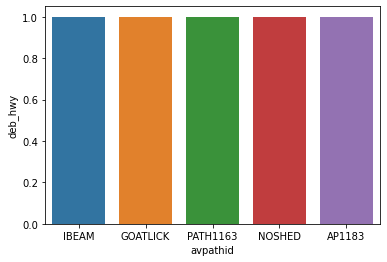

In [30]:

sns.barplot(x = 'avpathid',
            y = 'deb_hwy',
            data = highway)


In [13]:
railway = avyobs.loc[avyobs.deb_rail == True]
railway

,avrid,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
38,39,SHED05,2011-01-16,20:15:00,stein_01,HS,5.0,N,R4,D4,O,T,C,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,30.0,0.2,False,0.0,0.0,HS-N-R4-D3.5-O. 85% SZ. This was a rain/snow...,Steiner,2016-03-17 11:50:56,01,Ted,2020-06-29 11:14:49,64.91.61.64
72,73,SHED05,2009-01-08,13:59:00,stein_01,HS,5.0,N,U,D3,G,T,U,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,30.0,8.0,False,0.0,0.0,backfilled snowshed 30' height 100' linear - a...,NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:58:51,64.91.61.64
87,89,SHED08,2008-12-29,12:25:00,stein_01,SS,5.0,N,R3,D3,G,U,L,0,0,N,0,0,0,0,0,0,BR,-,U,U,True,0.0,0.0,False,0.0,0.0,"8 foot crown, path filled and debris over the ...",NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:36:19,64.91.61.64
140,143,SHED08,2006-02-25,12:55:00,stein_01,SS,1.0,AE,R3,D3,U,M,C,0,1870,E,1333,537,60,180,90,135,BR,-,U,D,True,20.0,0.5,False,0.0,0.0,Explosives triggered avalanche. 2006-02-25 mi...,NaN,2016-03-17 11:50:56,NaN,Ted,2020-06-29 10:42:33,64.91.61.64
218,221,SHED07E,2014-03-09,17:06:00,stein_01,WS,5.0,NC,R2,D2.5,O,M,L,38,1818,N,1318,500,60,90,60,75,BR,-,2F,W,True,0.0,0.0,False,0.0,0.0,Released as a SS at rain line about half way d...,Ted,2016-03-17 11:50:56,10.173.132.4,Ted,2020-06-29 11:44:57,64.91.61.64
230,233,SHED07W,2014-03-06,00:05:00,stein_01,SS,5.0,N,R3,D3.5,O,T,R,35,1924,N,1327,597,360,120,120,120,MR,-,U,W,True,30.0,20.0,False,0.0,0.0,SS-N-R3-D3+-O. Avg. Aspect= 180\nTerminus con...,Ted,2016-03-17 11:50:56,72.160.63.46,Ted,2020-06-29 12:33:15,64.91.61.64
254,257,SHED107,2017-02-06,10:00:00,clark_01,SS,5.0,NU,R2,D3,U,U,U,0,1796,N,1257,539,0,0,0,0,MR,-,U,U,True,20.0,0.2,False,0.0,0.0,Terminated on Shed 10.7 roof,Ted,2017-02-27 13:45:27,139.51.15.22,Ted,2020-06-29 10:16:11,64.91.61.64
256,259,SHED07E,2017-02-06,10:15:00,clark_01,SS,5.0,NU,R3,D3,U,T,C,40,1882,N,1294,588,70,90,90,90,TR,-,U,D,True,30.0,1.5,False,0.0,0.0,Terminated in runout below Shed 7. Climbing l...,Ted,2017-02-27 14:18:50,139.51.15.22,Ted,2020-06-29 10:14:50,64.91.61.64
257,260,PATH1163,2017-02-09,08:30:00,stein_01,SS,5.0,N,R3,D3,I,M,L,40,2028,SE,1236,792,45,120,90,105,BR,-,U,D,True,100.0,1.5,True,20.0,0.1,Natural SS avalanche in Path 1163 triggered na...,Ted,2017-02-27 15:25:55,139.51.15.20,Ted,2020-06-29 13:13:18,64.91.61.64
259,262,JAKES,2017-01-18,12:35:00,stein_01,L,5.0,N,R3,D2,G,T,C,40,1588,N,1265,323,0,0,0,0,U,BP,U,W,True,10.0,0.8,False,0.0,0.0,"Wet, loose avalanche. Covered Main 1- Inside ...",Ted,2017-02-27 15:45:37,139.51.15.19,Ted,2020-06-29 10:28:52,64.91.61.64
